# NYC_cabs

In [2]:
#Importation des Modules nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/NYC_cabs")


#On peut ensuite importer le dossier comme un module

from src.utils import *


ModuleNotFoundError: No module named 'seaborn'

In [89]:
df = pd.read_csv("/home/apprenant/PycharmProjects/NYC_cabs/data/clean.csv", parse_dates= [2,3] )

## 1. Exploration des données

## 1.1 calculer la vitesse moyenne de chaque trajet (en km/h) 

In [90]:
# pour ce calcul il faut la distance en km, le temps de trajet en heure.


# cooordonnées GPS en radians du 1er point (ici, mairie de Tours)
latA = deg2rad(47.390668)  # Nord
longA = deg2rad(0.689319)  # Est

# cooordonnées GPS en radians du 2ème point (ici, mairie de Limoges)
latB = deg2rad(45.826516)  # Nord
longB = deg2rad(1.260290)  # Est

dist_km = (distanceGPS(latA, longA, latB, longB))/1000
print(int(dist_km),"km")

179 km


In [91]:
df['distance'] = lat_and_long_to_distance(df['pickup_latitude'].values,df['pickup_longitude'].values, df['dropoff_latitude'].values,df['dropoff_longitude'].values)


In [92]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,455,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,663,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,2124,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,429,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,435,1.188588


In [93]:
df["trip_duration"] = df["trip_duration"]/3600 # la colonne trip_duration est transformé en h 

In [94]:
df["speed"] = df["distance"] / df["trip_duration"] # nouvelle colonne speed qui a pour unité le km/h

In [95]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,0.126389,1.498521,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,0.184167,1.805507,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,0.590000,6.385098,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,0.119167,1.485498,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,0.120833,1.188588,9.836594


## 1.2 calculer le nombre de trajets effectués en fonction du jour de la semaine 

In [96]:
df['weekday'] = df['pickup_datetime'].dt.day_name()
print(df.groupby(df['weekday']).count()['id'])

weekday
Friday       223533
Monday       187418
Saturday     220868
Sunday       195366
Thursday     218574
Tuesday      202749
Wednesday    210136
Name: id, dtype: int64


## 1.3 calculer le nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h.

In [97]:
def hr_func(ts):
    return ts.hour

In [98]:
df['time_hour'] = df['pickup_datetime'].apply(hr_func)

In [99]:
list_0_to_3 = []
list_4_to_7 = []
list_8_to_11 = []
list_12_to_15 = []
list_16_to_19 = []
list_20_to_23 = []
for value in df['time_hour'] : 
    if value in [0 ,1, 2 ,3 ] : 
        list_0_to_3.append(value)
    elif value in [4,5,6,7] : 
        list_4_to_7.append(value)
    elif value in [8,9,10,11] :
        list_8_to_11.append(value)
    elif value in [12,13,14,15] :
        list_12_to_15.append(value)
    elif value in [16,17,18,19] : 
        list_16_to_19.append(value)
    else : 
        list_20_to_23.append(value)



In [100]:
print(len(list_0_to_3)) # affiche le nombre de trajet entre minuit et 4h 
print(len(list_4_to_7)) # affiche le nombre de trajet entre 4h et 8h
print(len(list_8_to_11)) # affiche le nombre de trajet entre 8h et 12h
print(len(list_12_to_15)) # affiche le nombre de trajet entre 12h et 16h
print(len(list_16_to_19)) # affiche le nombre de trajet entre 16h et 20h
print(len(list_20_to_23)) # affiche le nombre de trajet entre 20h et minuit

140686
119642
268629
289449
321704
318534


## 1.4 calculer le nombre de km parcourus par jour de la semaine

In [101]:
df_km_day = df.groupby(df['weekday']).distance.sum()
print(round(df_km_day,2))

weekday
Friday       758724.47
Monday       668482.11
Saturday     736411.13
Sunday       726453.25
Thursday     747677.63
Tuesday      678328.10
Wednesday    702918.80
Name: distance, dtype: float64


## 1.5 Exploration des données 

<AxesSubplot:>

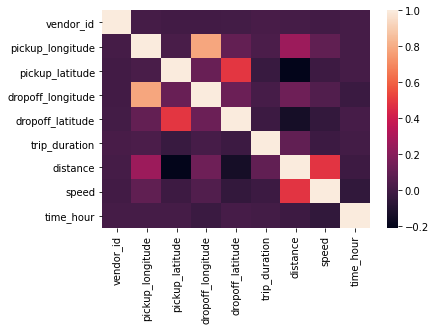

In [102]:
sns.heatmap(df.corr())

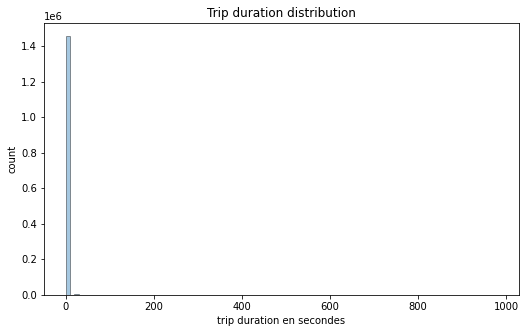

In [103]:
num_bins = 100
fig = plt.figure(figsize=(8.5, 5))
plt.hist(df['trip_duration'], num_bins, edgecolor = 'black', alpha = .40)


plt.xlabel('trip duration en secondes')
plt.ylabel('count')
plt.title("Trip duration distribution")
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='speed'>

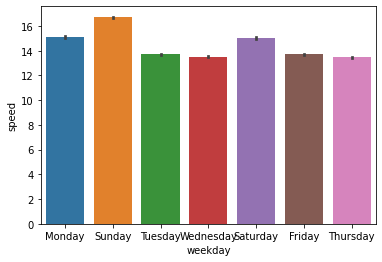

In [104]:
sns.barplot(x = 'weekday', y = 'speed',data = df)

Ce graphique nous montre la vitesse moyenne en fonction du jour de la semaine. On peut voir que le dimanche est la meilleure journée pour circuler du a un trafic moins important 

<AxesSubplot:xlabel='time_hour', ylabel='count'>

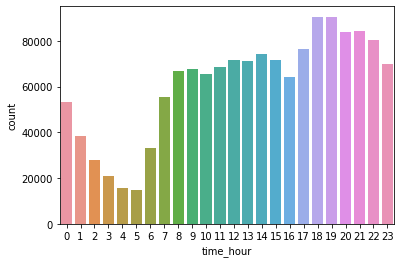

In [105]:
sns.countplot(x = df['time_hour'])

Ce graphique compte le nombre de trajet par heure 

<AxesSubplot:xlabel='weekday', ylabel='count'>

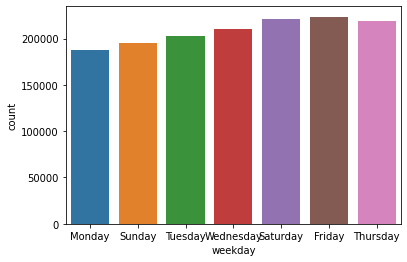

In [106]:
sns.countplot(x = df["weekday"] )

Ce graphique nous montre le nombre de trajet par jour

In [107]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,weekday,time_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,0.126389,1.498521,11.856428,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,0.184167,1.805507,9.803659,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,0.590000,6.385098,10.822201,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,0.119167,1.485498,12.465721,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,0.120833,1.188588,9.836594,Saturday,13


In [108]:
df.to_csv("/home/apprenant/PycharmProjects/NYC_cabs/data/clean.csv", index = False , sep = ',' , encoding = 'utf-8', line_terminator = '\n' )